<a href="https://colab.research.google.com/github/Omar-Works/ID-2024/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connecting to **Malariav2** dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Evaluates model performance

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef

def find_result():
    predictions = model.predict(test_generator)
    predictions = (predictions > 0.5).astype(int).flatten()  # Convert to binary labels

    # True labels
    y_true = test_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, predictions)
    classification_error = 1 - accuracy
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    specificity = recall_score(y_true, predictions, pos_label=0)
    fall_out = 1 - specificity
    mcc = matthews_corrcoef(y_true, predictions)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Classification Error:", classification_error)
    print("Precision:", precision)
    print("Recall (Sensitivity):", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Fall-Out:", fall_out)
    print("Matthews Correlation Coefficient:", mcc)
    print("Confusion Matrix:\n", confusion_matrix(y_true, predictions))
    print("Classification Report:\n", classification_report(y_true, predictions))


In [4]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Set the random seed for reproducibility
np.random.seed(42)  # For NumPy random operations
tf.random.set_seed(42)  # For TensorFlow operations

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

for layer in base_model.layers[:10]:
    layer.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])


In [6]:
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest', validation_split=0.2)  # Added validation split

# Use separate subsets for training and validation
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specify training subset
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify validation subset
)

# Evaluate the model on the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Malariav2/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Ensure order for metric calculations
)

Found 333 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Low learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 112s 9s/step - accuracy: 0.5018 - loss: 0.7051 - val_accuracy: 0.5301 - val_loss: 0.6726
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 596ms/step - accuracy: 0.5388 - loss: 0.6762 - val_accuracy: 0.6627 - val_loss: 0.6416
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 677ms/step - accuracy: 0.7902 - loss: 0.6226 - val_accuracy: 0.6024 - val_loss: 0.5638
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 725ms/step - accuracy: 0.6996 - loss: 0.5391 - val_accuracy: 0.8795 - val_loss: 0.4546
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 589ms/step - accuracy: 0.8416 - loss: 0.4637 - val_accuracy: 0.9518 - val_loss: 0.2931
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 695ms/step - accuracy: 0.9091 - loss: 0.3239 - val_accuracy: 0.9518 - val_loss: 0.1866
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 695ms/step - accuracy: 0.9154 - loss: 0.2221 - val_accuracy: 0.9880 - val_loss: 0.1095
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 615ms/step - accuracy: 0.9362 - loss: 0.1719 - val_accuracy: 0.9

In [8]:
find_result()

5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step
Accuracy: 0.917910447761194
Classification Error: 0.08208955223880599
Precision: 0.7962962962962963
Recall (Sensitivity): 1.0
F1 Score: 0.8865979381443299
Specificity: 0.8791208791208791
Fall-Out: 0.1208791208791209
Matthews Correlation Coefficient: 0.8366843491070572
Confusion Matrix:
 [[80 11]
 [ 0 43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        91
           1       0.80      1.00      0.89        43

    accuracy                           0.92       134
   macro avg       0.90      0.94      0.91       134
weighted avg       0.93      0.92      0.92       134



In [ ]:
# Save the entire model
model.save('/content/drive/MyDrive/saved_models/vgg16-final_model.keras')  # Save to your Google Drive

In [9]:
result = model.evaluate(test_generator)  # Assuming test_generator is defined
print('Test Loss:', result[0])
print('Test Accuracy:', result[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.8897 - loss: 0.2513
Test Loss: 0.2139972448348999
Test Accuracy: 0.9179104566574097


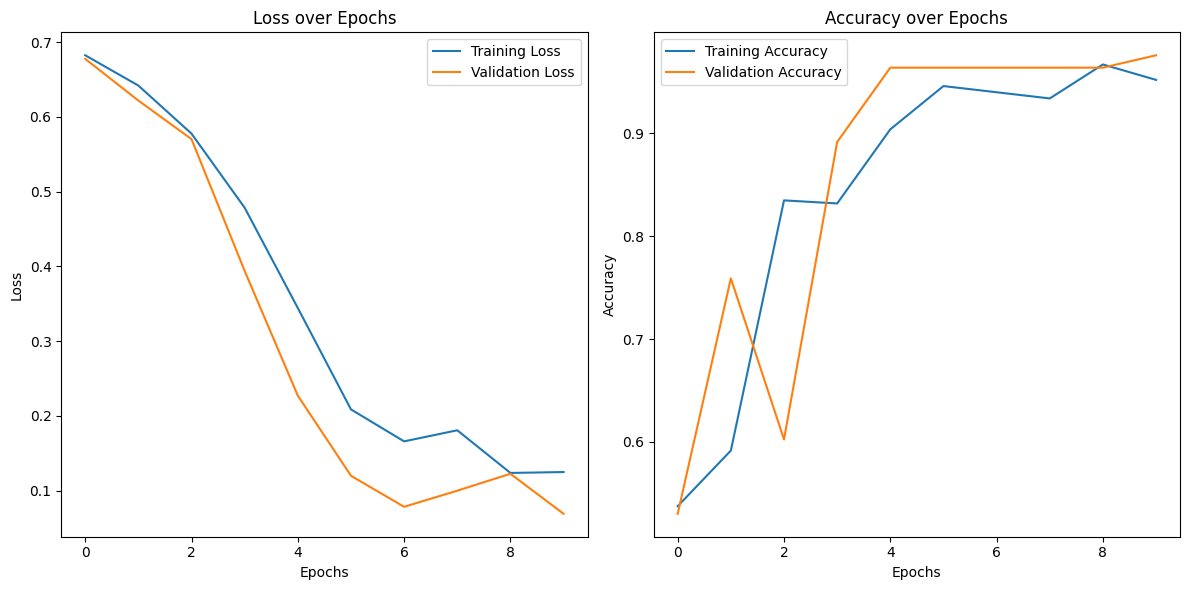

In [ ]:
# Import Matplotlib
import matplotlib.pyplot as plt # This line imports the 'pyplot' module from Matplotlib and assigns it the alias 'plt'

# Plotting the loss
plt.figure(figsize=(12, 6))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,462,597 (158.17 MB)

 Trainable params: 13,242,369 (50.52 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

 Optimizer params: 26,484,740 (101.03 MB)